In [1]:
import matplotlib
# matplotlib.use('tkAgg')
import matplotlib.pyplot as plt
import glob
import sys
from matplotlib.ticker import MultipleLocator
import json
import os
import pandas as pd
import numpy as np
import pdb
from IPython.display import Image

In [2]:
schemes = ['naive', 'constant', 'pctrl_66']#, 'pctrl_68', 'pctrl_70']
times = np.arange(0, 20, 1)

In [3]:
processed = {} # number of processed queries in limited time {'naive': [1000,2000...]}

for scheme in schemes:
    processed[scheme] = []
    with open(f'../{scheme}_bert.json') as f:
        read = json.load(f)
    lats = read.values()
    lat_list = []
    for lat in lats:
        lat_list += lat
    times_ind = 0
    total_time = 0
    cnt = 0
    for query in lat_list:
        cnt += 1
        total_time += query
        if total_time >= times[times_ind] * 60:
            processed[scheme].append(cnt)
            times_ind += 1
            if times_ind == len(times):
                break


In [4]:
processed

{'naive': [1,
  198,
  408,
  611,
  804,
  996,
  1191,
  1383,
  1578,
  1770,
  1964,
  2158,
  2349,
  2544,
  2735,
  2929,
  3124,
  3316,
  3510,
  3702],
 'constant': [1,
  193,
  401,
  609,
  817,
  1025,
  1231,
  1439,
  1647,
  1855,
  2062,
  2269,
  2477,
  2685,
  2892,
  3100,
  3308,
  3516,
  3724,
  3932],
 'pctrl_66': [1,
  193,
  401,
  609,
  815,
  1023,
  1231,
  1438,
  1646,
  1851,
  2059,
  2267,
  2475,
  2683,
  2890,
  3098,
  3306,
  3514,
  3721,
  3926]}

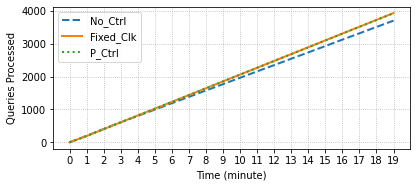

In [16]:
fig, axs = plt.subplots(1, 1, gridspec_kw={'hspace': 0.1, 'wspace': 0.2, 'bottom': 0.13, 
                                               'top': 0.92, 'right':0.995, 'left':0.17}, figsize=(6,2.5))
# x = np.arange(len(schemes))
labels = ['No_Ctrl', 'Fixed_Clk', 'P_Ctrl']
style = ['dashed', 'solid', 'dotted']

for scheme in schemes:
    data = processed[scheme]
    ind = schemes.index(scheme)
    axs.plot(times, data, zorder=3, label=labels[ind], ls=style[ind], lw=2.)
    axs.set_xticks(times)
    axs.set_xticklabels(times)
#     axs.set_title(f'At {times[i]} Minutes')
# axs.set_ylim(0.8,1.1)
axs.grid(which='major', axis='both', ls='dotted', zorder=0)
axs.legend()
axs.set_xlabel('Time (minute)')
axs.set_ylabel('Queries Processed')
fig.savefig(f'compare.png', bbox_inches='tight')